In [13]:
import numpy as np
import scipy as sp
from skimage import io
import matplotlib.pyplot as plt

BLACK = 252
WHITE = 4095
R_SCALE = 1.667969
G_SCALE = 1.000000
B_SCALE = 1.445313

In [14]:
raw_image = io.imread('data/campus.tiff')

In [16]:
raw_image = raw_image.astype(np.float64)

raw_image -= np.ones_like(raw_image) * BLACK
raw_image /= (WHITE - BLACK)
np.clip(raw_image, 0, 1, out=raw_image);

## Adding RGB channels

For now the Bayer pattern is just a guess

In [20]:
raw_image_R = raw_image[0::2, 0::2]
raw_image_G0 = raw_image[0::2, 1::2]
raw_image_G1 = raw_image[1::2, 0::2]
raw_image_B = raw_image[1::2, 1::2]

In [21]:
im_rgb = np.dstack((raw_image_R, raw_image_G0, raw_image_B))

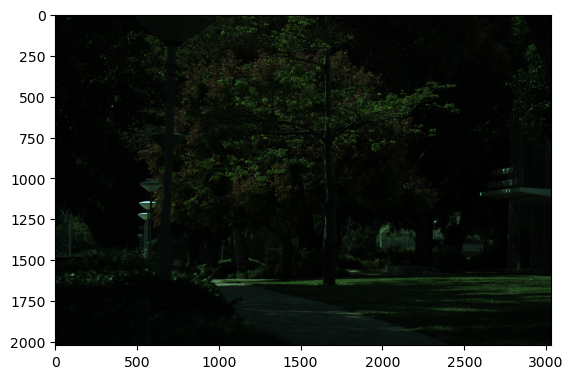

In [22]:
plt.imshow(im_rgb / np.max(im_rgb))

## White Balance

In [23]:
def gray_world(im):
    # normalize each channel by its average
    R_average = np.mean(im[0::2, 0::2])
    G_average = np.mean(np.append(im[1::2, 0::2], im[0::2, 1::2]))
    B_average = np.mean(im[1::2, 1::2])

    im[0::2, 0::2] *= G_average / R_average
    im[1::2, 1::2] *= G_average / B_average
    
    im *= np.mean(np.append(im[0::2, 1::2], im[1::2, 0::2]))

gray_world(raw_image)

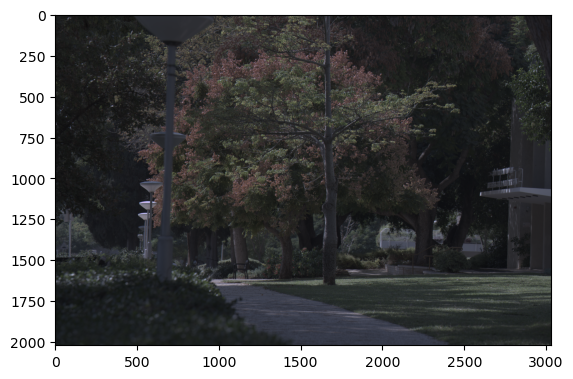

In [25]:
raw_image_R = raw_image[0::2, 0::2]
raw_image_G0 = raw_image[0::2, 1::2]
raw_image_G1 = raw_image[1::2, 0::2]
raw_image_B = raw_image[1::2, 1::2]

im_rgb = np.dstack((raw_image_R, raw_image_G0, raw_image_B))

to_plot = im_rgb
to_plot -= np.min(to_plot)
to_plot /= np.max(to_plot) 
to_plot = np.pow(to_plot, 1 / 2.2)

plt.imshow(to_plot)

In [26]:
x_index = np.arange(0,4000,2)
y_index = np.arange(0,6000,2)

In [27]:
x,y = np.meshgrid(x_index, y_index)

In [32]:
list(zip(y.flatten(), x.flatten()))

[(np.int64(0), np.int64(0)),
 (np.int64(0), np.int64(2)),
 (np.int64(0), np.int64(4)),
 (np.int64(0), np.int64(6)),
 (np.int64(0), np.int64(8)),
 (np.int64(0), np.int64(10)),
 (np.int64(0), np.int64(12)),
 (np.int64(0), np.int64(14)),
 (np.int64(0), np.int64(16)),
 (np.int64(0), np.int64(18)),
 (np.int64(0), np.int64(20)),
 (np.int64(0), np.int64(22)),
 (np.int64(0), np.int64(24)),
 (np.int64(0), np.int64(26)),
 (np.int64(0), np.int64(28)),
 (np.int64(0), np.int64(30)),
 (np.int64(0), np.int64(32)),
 (np.int64(0), np.int64(34)),
 (np.int64(0), np.int64(36)),
 (np.int64(0), np.int64(38)),
 (np.int64(0), np.int64(40)),
 (np.int64(0), np.int64(42)),
 (np.int64(0), np.int64(44)),
 (np.int64(0), np.int64(46)),
 (np.int64(0), np.int64(48)),
 (np.int64(0), np.int64(50)),
 (np.int64(0), np.int64(52)),
 (np.int64(0), np.int64(54)),
 (np.int64(0), np.int64(56)),
 (np.int64(0), np.int64(58)),
 (np.int64(0), np.int64(60)),
 (np.int64(0), np.int64(62)),
 (np.int64(0), np.int64(64)),
 (np.int64(0), 